<a href="https://colab.research.google.com/github/Balajilp/Anomaly_Detection/blob/main/Anomaly_Detection_of_ECG_using_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
!unzip ECG5000.zip

--2022-03-07 06:37:26--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  7.45MB/s    in 1.4s    

2022-03-07 06:37:28 (7.45 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [ ]:
# if we want to see the output of this particular download we can use thid unix command
!ls -alrt

total 36800
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip
-rw-r--r-- 1 root root       38 Aug  9  2019 ECG5000.txt
-rw-r--r-- 1 root root  7086857 Aug  9  2019 ECG5000_TEST.arff
-rw-r--r-- 1 root root  1128500 Aug  9  2019 ECG5000_TRAIN.txt
-rw-r--r-- 1 root root   790229 Aug  9  2019 ECG5000_TRAIN.arff
-rw-r--r-- 1 root root 10156500 Aug  9  2019 ECG5000_TEST.txt
-rw-r--r-- 1 root root  7083409 Aug  9  2019 ECG5000_TEST.ts
-rw-r--r-- 1 root root   786781 Aug  9  2019 ECG5000_TRAIN.ts
drwxr-xr-x 1 root root     4096 Feb 18 14:33 .config
drwxr-xr-x 1 root root     4096 Feb 18 14:33 sample_data
drwxr-xr-x 1 root root     4096 Mar  7 06:36 ..
drwxr-xr-x 1 root root     4096 Mar  7 06:37 .


In [ ]:
# we are concatinating the train.txt and test.txt using unix command
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [ ]:
# printing the head records of the concatinated data using unix command
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [ ]:
# Loading the dataframe using pandas
df = pd.read_csv('ecg_final.txt', sep = '  ', header=None)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4.0,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,2.0,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932
4997,2.0,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,...,-0.896575,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531
4998,2.0,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,...,-2.495989,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568


In [ ]:
# printing the features
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [ ]:
# we cannot perform slicing on numerical column names. pandas doesn't allow as to do that
# pandas provide inbuild function called add_prefix to convert column nmaes to objects

df = df.add_prefix('c')

In [ ]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [ ]:
# doing value colunt of target feature.  here c0 is our target whether it is normal activity of abnormal activity
df['c0'].value_counts()
# here 1.0 is the normal activity,  remaining all others are obnormal activity can convert this all abnormal into a unique name

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [ ]:
# getting a basic statistical description
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [ ]:
# performing train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.values, df.values[:, 0:1], test_size=0.2, random_state=111)

In [ ]:
# Scaling the training data
Scaler = MinMaxScaler()
data_scaled = Scaler.fit(X_train)

In [ ]:
# above we just fitted but here we need to transform the training and testing data
train_data_scaled = data_scaled.transform(X_train)
test_data_scaled = data_scaled.transform(X_test)

In [ ]:
train_data_scaled

array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.70698484, 0.7982501 , ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.        , 0.46498254, 0.25827775, ..., 0.6340938 , 0.66453824,
        0.47717869],
       [0.25      , 0.69314707, 0.79831145, ..., 0.68561341, 0.61110713,
        0.53512758]])

In [ ]:
# capturing the normal train and abnormal train data
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0==0').values[:, 1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0>0').values[:, 1:]

In [ ]:
# capturing the normal and abnormal test data
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0==0').values[:, 1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0>0').values[:, 1:]

In [ ]:
# print the shape of normal train and test data
print(normal_train_data.shape)
print(normal_test_data.shape)

(2356, 140)
(563, 140)


In [ ]:
# print the shape of anomaly train and test data
print(anomaly_train_data.shape)
print(anomaly_test_data.shape)

(1644, 140)
(437, 140)


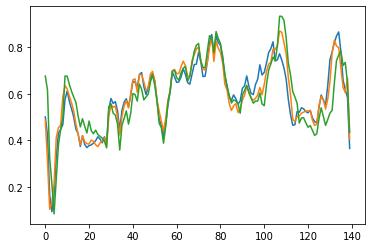

In [ ]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

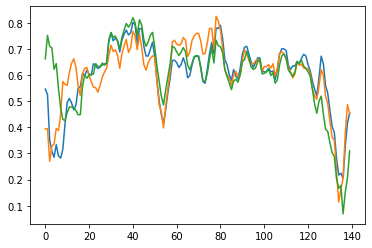

In [ ]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [ ]:
# one way to create encoder and decoders.  This is not a very good method
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu')) # 1 means encoders 
model.add(tf.keras.layers.Dense(32, activation='relu')) # 1
model.add(tf.keras.layers.Dense(16, activation='relu')) # 1
model.add(tf.keras.layers.Dense(8, activation='relu')) # context vector / bottle neck vector
model.add(tf.keras.layers.Dense(16, activation='relu')) # 2 means decoders
model.add(tf.keras.layers.Dense(32, activation='relu')) # 2
model.add(tf.keras.layers.Dense(64, activation='relu')) # 2
model.add(tf.keras.layers.Dense(140, activation='sigmoid')) # 2

SyntaxError: ignored

In [ ]:
# Another way to create encoder and decoders
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(32, activation='relu'),
                                        tf.keras.layers.Dense(16, activation='relu'),
                                        tf.keras.layers.Dense(8, activation='relu')

    ])
    self.decoder = tf.keras.Sequential([
                                        tf.keras.layers.Dense(16, activation='relu'),
                                        tf.keras.layers.Dense(32, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(140, activation='sigmoid')
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded




In [ ]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_cross',
                                                  patience=2,
                                                  mode='min')
model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(normal_train_data, normal_train_data,
                    epochs=50,
                    batch_size=128,
                    validation_data=(train_data_scaled[:, 1:], train_data_scaled[:, 1:]),
                    shuffle=True,
                    callbacks=[early_stopping])


Epoch 1/50
19/19 [==============================] - 2s 25ms/step - loss: 0.1267 - val_loss: 0.1136
Epoch 2/50
19/19 [==============================] - 0s 14ms/step - loss: 0.0796 - val_loss: 0.0817
Epoch 3/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0536 - val_loss: 0.0765
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0483 - val_loss: 0.0743
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0465 - val_loss: 0.0718
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0447 - val_loss: 0.0693
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0425 - val_loss: 0.0669
Epoch 8/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0401 - val_loss: 0.0649
Epoch 9/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.0635
Epoch 10/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0378 - val_loss: 0.0629
Epoch 11/50
19/19

In [ ]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [ ]:
encoder_out.shape

(563, 8)

In [ ]:
decoder_out.shape

(563, 140)

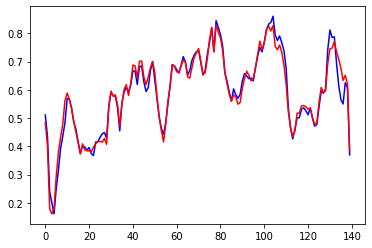

In [ ]:
plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')

In [ ]:
# predict for anomaly data
encoder_out_a = model.encoder(anomaly_train_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

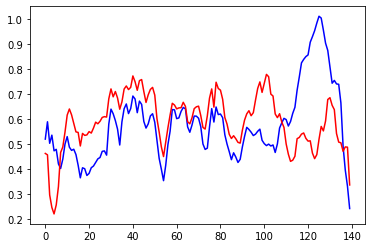

In [ ]:
plt.plot(anomaly_test_data[0], 'b')
plt.plot(decoder_out_a[0], 'r')

(array([ 4.,  9., 30., 50., 61., 46., 58., 44., 52., 38., 28., 23., 12.,
        14., 12., 11., 12.,  7., 13.,  6.,  4.,  1.,  6.,  5.,  1.,  1.,
         3.,  3.,  0.,  0.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([0.00963673, 0.01130585, 0.01297498, 0.0146441 , 0.01631323,
        0.01798236, 0.01965148, 0.02132061, 0.02298973, 0.02465886,
        0.02632798, 0.02799711, 0.02966624, 0.03133536, 0.03300449,
        0.03467361, 0.03634274, 0.03801187, 0.03968099, 0.04135012,
        0.04301924, 0.04468837, 0.0463575 , 0.04802662, 0.04969575,
        0.05136487, 0.053034  , 0.05470313, 0.05637225, 0.05804138,
        0.0597105 , 0.06137963, 0.06304876, 0.06471788, 0.06638701,
        0.06805613, 0.06972526, 0.07139438, 0.07306351, 0.07473264,
        0.07640176, 0.07807089, 0.07974001, 0.08140914, 0.08307827,
        0.08474739, 0.08641652, 0.08808564, 0.08975477, 0.0914239 ,
        0.09309302]),
 <a list of 50

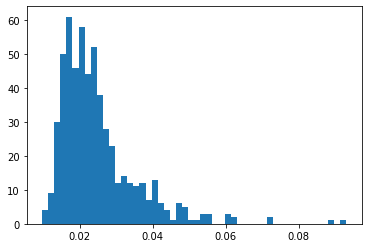

In [ ]:
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)
plt.hist(train_loss, bins=50) 

In [ ]:
np.mean(train_loss)

0.02478895416688671

In [ ]:
np.std(train_loss)

0.010627527051776149

In [ ]:
threshold = np.mean(train_loss) + 2 * np.std(train_loss)

(array([ 1.,  0.,  0.,  0.,  0.,  2.,  2.,  5.,  4.,  3.,  9.,  7., 13.,
        21., 28., 36., 47., 52., 47., 45., 22., 36., 19., 13., 10.,  2.,
         1.,  1.,  0.,  0.,  1.,  1.,  0.,  2.,  1.,  1.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.03158084, 0.03477207, 0.0379633 , 0.04115452, 0.04434575,
        0.04753698, 0.05072821, 0.05391944, 0.05711067, 0.0603019 ,
        0.06349313, 0.06668435, 0.06987558, 0.07306681, 0.07625804,
        0.07944927, 0.0826405 , 0.08583173, 0.08902296, 0.09221418,
        0.09540541, 0.09859664, 0.10178787, 0.1049791 , 0.10817033,
        0.11136156, 0.11455279, 0.11774401, 0.12093524, 0.12412647,
        0.1273177 , 0.13050893, 0.13370016, 0.13689139, 0.14008262,
        0.14327384, 0.14646507, 0.1496563 , 0.15284753, 0.15603876,
        0.15922999, 0.16242122, 0.16561245, 0.16880367, 0.1719949 ,
        0.17518613, 0.17837736, 0.18156859, 0.18475982, 0.18795105,
        0.19114228]),
 <a list of 50

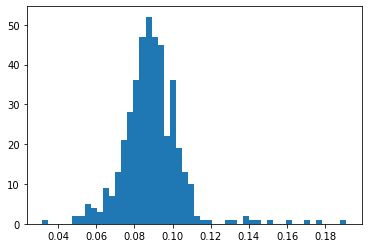

In [ ]:
reconstruction_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstruction_a, anomaly_test_data)

plt.hist(train_loss_a, bins=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


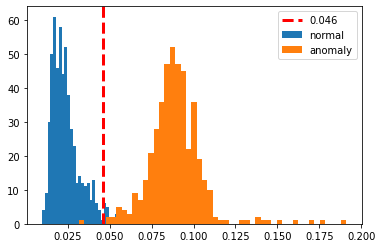

In [ ]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_a, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper_right')
plt.show()

In [ ]:
np.mean(train_loss_a)

0.08903980389325078

In [ ]:
np.std(train_loss_a)

0.01615725731514496

In [ ]:
tf.math.less(train_loss, threshold)

<tf.Tensor: shape=(563,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [ ]:
preds = tf.math.less(train_loss, threshold)

In [ ]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=535>

In [ ]:
preds.shape

TensorShape([563])